In [3]:
from glob import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
%matplotlib inline

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Looking at mean of validation loss, and difference between training and validation loss

In [5]:
study_paths = glob("/home/kevin/workspace/Kaggle/Iceberg-Classifier-Challenge/study_results/densenet169_study/**")

In [6]:
study_paths

['/home/kevin/workspace/Kaggle/Iceberg-Classifier-Challenge/study_results/densenet169_study/generation_0']

In [7]:
experiment_config_paths = [p for sp in study_paths for p in glob(f"{sp}/**/*config.json")]
experiment_results_paths = [p for sp in study_paths for p in glob(f"{sp}/**/*results.json")]

In [8]:
data = []
for cfg_path, res_path in zip(experiment_config_paths, experiment_results_paths):
    config = json.load(open(cfg_path, "r"))
    res = json.load(open(res_path, "r"))
    data.append({"config": config, "id": config['id'], "generation": config['generation'], **config['optimizer'], **res})

In [9]:
df = pd.DataFrame(data)

In [10]:
df

,config,generation,id,name,parameters,train_val_loss_avg_diff,val_loss_mean,val_loss_var
0,"{'id': 'cc9469ba-60a3-4ade-b446-63aa04f73722',...",0,cc9469ba-60a3-4ade-b446-63aa04f73722,ADAM,"{'lr': 1e-05, 'weight_decay': 0.01}",-0.174920,0.277176,0.0
1,"{'id': '7d3819df-5c19-4d6f-9cea-b755e90ff573',...",0,7d3819df-5c19-4d6f-9cea-b755e90ff573,ADAM,"{'lr': 1e-05, 'weight_decay': 0.01}",-0.132635,0.267290,0.0
2,"{'id': '2d353597-ee37-42ad-8ff3-8ff43c05ef63',...",0,2d353597-ee37-42ad-8ff3-8ff43c05ef63,ADAM,"{'lr': 1e-05, 'weight_decay': 0.01}",-0.036324,0.261730,0.0
3,"{'id': 'a91e5214-2f73-49f7-bfd3-329d9552fceb',...",0,a91e5214-2f73-49f7-bfd3-329d9552fceb,ADAM,"{'lr': 1e-05, 'weight_decay': 0.01}",-0.081118,0.266668,0.0
4,"{'id': '352458aa-17e8-400b-af47-5d06d025d655',...",0,352458aa-17e8-400b-af47-5d06d025d655,ADAM,"{'lr': 1e-05, 'weight_decay': 0.01}",-0.043927,0.256930,0.0
5,"{'id': 'f4f3f1d1-1c07-42b3-b595-507338006e4c',...",0,f4f3f1d1-1c07-42b3-b595-507338006e4c,ADAM,"{'lr': 1e-05, 'weight_decay': 0.01}",-0.131375,0.233392,0.0
6,"{'id': '030cff07-7068-4bb0-a56f-64720d95ef2d',...",0,030cff07-7068-4bb0-a56f-64720d95ef2d,ADAM,"{'lr': 1e-05, 'weight_decay': 0.01}",-0.203003,0.278402,0.0
7,"{'id': '43400dbc-fa1b-48ca-a405-d4babbb60a55',...",0,43400dbc-fa1b-48ca-a405-d4babbb60a55,ADAM,"{'lr': 1e-05, 'weight_decay': 0.01}",-0.162171,0.269892,0.0
8,"{'id': 'a249697f-b7de-4a6d-82de-501b56958ac1',...",0,a249697f-b7de-4a6d-82de-501b56958ac1,ADAM,"{'lr': 1e-05, 'weight_decay': 0.01}",-0.186438,0.274283,0.0
9,"{'id': 'df298edd-9ee6-4188-bfdf-c3b90eec3cda',...",0,df298edd-9ee6-4188-bfdf-c3b90eec3cda,ADAM,"{'lr': 1e-05, 'weight_decay': 0.01}",-0.205017,0.270253,0.0


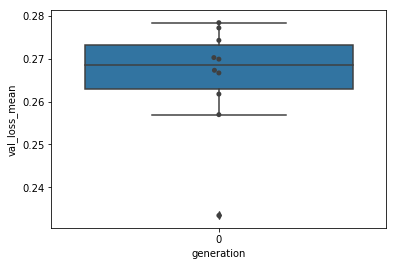

In [11]:
ax = sns.boxplot(x='generation', y='val_loss_mean', data=df)
ax = sns.swarmplot(x='generation', y='val_loss_mean', data=df, color='.25')

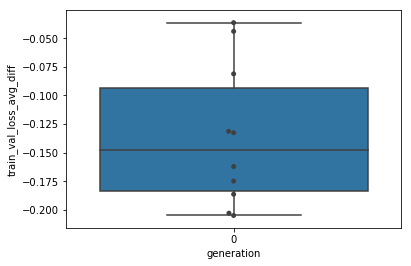

In [12]:
ax = sns.boxplot(x='generation', y='train_val_loss_avg_diff', data=df)
ax = sns.swarmplot(x='generation', y='train_val_loss_avg_diff', data=df, color='.25')

## Looking at the dropout rates

In [13]:
def query_df(df, sort_col='val_loss_mean', generation=list(range(10))):
    generation_crit = df["generation"].map(lambda x: x in generation)
    ret_df = df[generation_crit].sort_values([sort_col])
    return ret_df

In [14]:
val_loss = query_df(df)

In [15]:
data = OrderedDict()
for i, row in val_loss.iterrows():
    loss = row['val_loss_mean']
    model_config = row['config']['model']['config']
    dropout_configs = []
    for k, v in model_config.items():
        if "dropout" in k:
            dropout_configs.append((k, v))
    dropout_configs = sorted(dropout_configs, key=lambda x: x[0])
    data[loss] = dropout_configs

In [16]:
row['config']['optimizer']

{'name': 'ADAM', 'parameters': {'lr': 1e-05, 'weight_decay': 0.01}}

In [17]:
data = OrderedDict()
for i, row in val_loss.iterrows():
    loss = row['val_loss_mean']
    model_config = row['config']['model']['config']
    dropout_configs = []
    for k, v in model_config.items():
        if "dropout" in k:
            dropout_configs.append((k, v))
    dropout_configs = sorted(dropout_configs, key=lambda x: x[0])
    data[loss] = dropout_configs

In [18]:
dropout_data = OrderedDict()
for loss, dropout_configs in data.items():
    total_dropout = 0
#     print(dropout_configs)
    for dropout_config in dropout_configs:
        dropout = dropout_config[1]["parameters"]["p"]
        total_dropout += dropout
    dropout_data[loss] = total_dropout

In [19]:
dropout_data

OrderedDict([(0.23339210450649261, 0),
             (0.256929874420166, 0),
             (0.2617300748825073, 0),
             (0.2666681110858917, 0),
             (0.26729002594947815, 0),
             (0.2698916792869568, 0),
             (0.27025315165519714, 0),
             (0.2742833197116852, 0),
             (0.2771761417388916, 0),
             (0.2784020006656647, 0)])

## Loading in the best models 

In [20]:
k = 10
df_scored = df.sort_values(["val_loss_mean"])
top_k = df_scored.head(k)

In [21]:
base_study_path = "/home/kevin/workspace/Kaggle/Iceberg-Classifier-Challenge/study_results/densenet169_study"
top_k.loc[:,'study_save_path'] = [f"{base_study_path}/generation_{gen}" for gen in top_k['generation']]
top_k.loc[:,'training_data_path'] = ["../data/train.json" for _ in range(k)]
top_k.loc[:,'testing_data_path'] = ["../data/test.json" for _ in range(k)]

/home/kevin/miniconda3/envs/pytorch_0.3/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/kevin/miniconda3/envs/pytorch_0.3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [22]:
top_k

,config,generation,id,name,parameters,train_val_loss_avg_diff,val_loss_mean,val_loss_var,study_save_path,training_data_path,testing_data_path
5,"{'id': 'f4f3f1d1-1c07-42b3-b595-507338006e4c',...",0,f4f3f1d1-1c07-42b3-b595-507338006e4c,ADAM,"{'lr': 1e-05, 'weight_decay': 0.01}",-0.131375,0.233392,0.0,/home/kevin/workspace/Kaggle/Iceberg-Classifie...,../data/train.json,../data/test.json
4,"{'id': '352458aa-17e8-400b-af47-5d06d025d655',...",0,352458aa-17e8-400b-af47-5d06d025d655,ADAM,"{'lr': 1e-05, 'weight_decay': 0.01}",-0.043927,0.256930,0.0,/home/kevin/workspace/Kaggle/Iceberg-Classifie...,../data/train.json,../data/test.json
2,"{'id': '2d353597-ee37-42ad-8ff3-8ff43c05ef63',...",0,2d353597-ee37-42ad-8ff3-8ff43c05ef63,ADAM,"{'lr': 1e-05, 'weight_decay': 0.01}",-0.036324,0.261730,0.0,/home/kevin/workspace/Kaggle/Iceberg-Classifie...,../data/train.json,../data/test.json
3,"{'id': 'a91e5214-2f73-49f7-bfd3-329d9552fceb',...",0,a91e5214-2f73-49f7-bfd3-329d9552fceb,ADAM,"{'lr': 1e-05, 'weight_decay': 0.01}",-0.081118,0.266668,0.0,/home/kevin/workspace/Kaggle/Iceberg-Classifie...,../data/train.json,../data/test.json
1,"{'id': '7d3819df-5c19-4d6f-9cea-b755e90ff573',...",0,7d3819df-5c19-4d6f-9cea-b755e90ff573,ADAM,"{'lr': 1e-05, 'weight_decay': 0.01}",-0.132635,0.267290,0.0,/home/kevin/workspace/Kaggle/Iceberg-Classifie...,../data/train.json,../data/test.json
7,"{'id': '43400dbc-fa1b-48ca-a405-d4babbb60a55',...",0,43400dbc-fa1b-48ca-a405-d4babbb60a55,ADAM,"{'lr': 1e-05, 'weight_decay': 0.01}",-0.162171,0.269892,0.0,/home/kevin/workspace/Kaggle/Iceberg-Classifie...,../data/train.json,../data/test.json
9,"{'id': 'df298edd-9ee6-4188-bfdf-c3b90eec3cda',...",0,df298edd-9ee6-4188-bfdf-c3b90eec3cda,ADAM,"{'lr': 1e-05, 'weight_decay': 0.01}",-0.205017,0.270253,0.0,/home/kevin/workspace/Kaggle/Iceberg-Classifie...,../data/train.json,../data/test.json
8,"{'id': 'a249697f-b7de-4a6d-82de-501b56958ac1',...",0,a249697f-b7de-4a6d-82de-501b56958ac1,ADAM,"{'lr': 1e-05, 'weight_decay': 0.01}",-0.186438,0.274283,0.0,/home/kevin/workspace/Kaggle/Iceberg-Classifie...,../data/train.json,../data/test.json
0,"{'id': 'cc9469ba-60a3-4ade-b446-63aa04f73722',...",0,cc9469ba-60a3-4ade-b446-63aa04f73722,ADAM,"{'lr': 1e-05, 'weight_decay': 0.01}",-0.174920,0.277176,0.0,/home/kevin/workspace/Kaggle/Iceberg-Classifie...,../data/train.json,../data/test.json
6,"{'id': '030cff07-7068-4bb0-a56f-64720d95ef2d',...",0,030cff07-7068-4bb0-a56f-64720d95ef2d,ADAM,"{'lr': 1e-05, 'weight_decay': 0.01}",-0.203003,0.278402,0.0,/home/kevin/workspace/Kaggle/Iceberg-Classifie...,../data/train.json,../data/test.json


In [23]:
import sys

In [24]:
sys.path.append("/home/kevin/workspace/Kaggle/Iceberg-Classifier-Challenge")

In [25]:
from src.ExperimentMappings \
    import model_lookup, \
    loss_function_lookup, \
    optimizer_lookup, \
    scheduler_lookup, \
    output_transformation_lookup, \
    data_source_delegates_lookup, \
    trainer_delegates_lookup, \
    evaluation_delegates_lookup, \
    saver_delegates_lookup
from src.Experiment import ExperimentFactory
import json

In [26]:
experiment_factory = ExperimentFactory(model_lookup,
                                           loss_function_lookup,
                                           optimizer_lookup,
                                           scheduler_lookup,
                                           output_transformation_lookup,
                                           data_source_delegates_lookup,
                                           trainer_delegates_lookup,
                                           evaluation_delegates_lookup,
                                           saver_delegates_lookup)

In [27]:
from tqdm import tqdm
outputs = []
for i in tqdm(range(k)):
    data = top_k.iloc[i]
    exp_id = data['id']
    data['config'].update({"evaluation_delegate": {"name": "DenseNet"}})
    model_paths = glob(f"{data['study_save_path']}/{data['id']}/model_checkpoints/**/*.pth")
    model_paths = sorted(model_paths, key=lambda x: x.split("loss_")[-1])
    for path in tqdm(model_paths[:1]):
        experiment = experiment_factory.create_experiment(data['config'], data['study_save_path'], model_load_path=path)
        experiment.test()
        outputs.append({"id": exp_id, "output": experiment.evaluation_delegate.create_output()})

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

  1%|          | 1/132 [00:00<01:15,  1.74it/s]

  2%|▏         | 2/132 [00:00<00:59,  2.18it/s]

  3%|▎         | 4/132 [00:00<00:44,  2.87it/s]

  5%|▍         | 6/132 [00:01<00:34,  3.70it/s]

  6%|▌         | 8/132 [00:01<00:26,  4.64it/s]

  8%|▊         | 10/132 [00:01<00:21,  5.66it/s]

  9%|▉         | 12/132 [00:01<00:17,  6.68it/s]

 11%|█         | 14/132 [00:01<00:15,  7.64it/s]

 12%|█▏        | 16/132 [00:01<00:13,  8.50it/s]

 14%|█▎        | 18/132 [00:02<00:12,  9.23it/s]

 15%|█▌        | 20/132 [00:02<00:11,  9.82it/s]

 17%|█▋        | 22/132 [00:02<00:10, 10.28it/s]

 18%|█▊        | 24/132 [00:02<00:10, 10.64it/s]

 20%|█▉        | 26/132 [00:02<00:09, 10.89it/s]

 21%|██        | 28/132 [00:03<00:09, 11.07it/s]

 23%|██▎       | 30/132 [00:03<00:09, 11.21it/s]

 24%|██▍       | 32/132 [00:03<00:08, 11.31it/s]

 26%|██▌       | 34/132 [00:03<00:08, 11.38it/s]

 27%|██▋       | 36/132 [

  6%|▌         | 8/132 [00:00<00:10, 11.48it/s]

  8%|▊         | 10/132 [00:00<00:10, 11.48it/s]

  9%|▉         | 12/132 [00:01<00:10, 11.49it/s]

 11%|█         | 14/132 [00:01<00:10, 11.49it/s]

 12%|█▏        | 16/132 [00:01<00:10, 11.49it/s]

 14%|█▎        | 18/132 [00:01<00:09, 11.49it/s]

 15%|█▌        | 20/132 [00:01<00:09, 11.49it/s]

 17%|█▋        | 22/132 [00:01<00:09, 11.49it/s]

 18%|█▊        | 24/132 [00:02<00:09, 11.49it/s]

 20%|█▉        | 26/132 [00:02<00:09, 11.49it/s]

 21%|██        | 28/132 [00:02<00:09, 11.48it/s]

 23%|██▎       | 30/132 [00:02<00:08, 11.48it/s]

 24%|██▍       | 32/132 [00:02<00:08, 11.48it/s]

 26%|██▌       | 34/132 [00:02<00:08, 11.48it/s]

 27%|██▋       | 36/132 [00:03<00:08, 11.48it/s]

 29%|██▉       | 38/132 [00:03<00:08, 11.49it/s]

 30%|███       | 40/132 [00:03<00:08, 11.48it/s]

 32%|███▏      | 42/132 [00:03<00:07, 11.48it/s]

 33%|███▎      | 44/132 [00:03<00:07, 11.49it/s]

 35%|███▍      | 46/132 [00:04<00:07, 11.49it/s]

 

 17%|█▋        | 22/132 [00:01<00:09, 11.45it/s]

 18%|█▊        | 24/132 [00:02<00:09, 11.46it/s]

 20%|█▉        | 26/132 [00:02<00:09, 11.46it/s]

 21%|██        | 28/132 [00:02<00:09, 11.46it/s]

 23%|██▎       | 30/132 [00:02<00:08, 11.46it/s]

 24%|██▍       | 32/132 [00:02<00:08, 11.45it/s]

 26%|██▌       | 34/132 [00:02<00:08, 11.45it/s]

 27%|██▋       | 36/132 [00:03<00:08, 11.46it/s]

 29%|██▉       | 38/132 [00:03<00:08, 11.46it/s]

 30%|███       | 40/132 [00:03<00:08, 11.45it/s]

 32%|███▏      | 42/132 [00:03<00:07, 11.46it/s]

 33%|███▎      | 44/132 [00:03<00:07, 11.45it/s]

 35%|███▍      | 46/132 [00:04<00:07, 11.46it/s]

 36%|███▋      | 48/132 [00:04<00:07, 11.46it/s]

 38%|███▊      | 50/132 [00:04<00:07, 11.46it/s]

 39%|███▉      | 52/132 [00:04<00:06, 11.46it/s]

 41%|████      | 54/132 [00:04<00:06, 11.46it/s]

 42%|████▏     | 56/132 [00:04<00:06, 11.45it/s]

 44%|████▍     | 58/132 [00:05<00:06, 11.46it/s]

 45%|████▌     | 60/132 [00:05<00:06, 11.46it/s]



 27%|██▋       | 36/132 [00:03<00:08, 11.44it/s]

 29%|██▉       | 38/132 [00:03<00:08, 11.44it/s]

 30%|███       | 40/132 [00:03<00:08, 11.44it/s]

 32%|███▏      | 42/132 [00:03<00:07, 11.45it/s]

 33%|███▎      | 44/132 [00:03<00:07, 11.44it/s]

 35%|███▍      | 46/132 [00:04<00:07, 11.44it/s]

 36%|███▋      | 48/132 [00:04<00:07, 11.43it/s]

 38%|███▊      | 50/132 [00:04<00:07, 11.44it/s]

 39%|███▉      | 52/132 [00:04<00:06, 11.44it/s]

 41%|████      | 54/132 [00:04<00:06, 11.44it/s]

 42%|████▏     | 56/132 [00:04<00:06, 11.45it/s]

 44%|████▍     | 58/132 [00:05<00:06, 11.45it/s]

 45%|████▌     | 60/132 [00:05<00:06, 11.45it/s]

 47%|████▋     | 62/132 [00:05<00:06, 11.45it/s]

 48%|████▊     | 64/132 [00:05<00:05, 11.44it/s]

 50%|█████     | 66/132 [00:05<00:05, 11.45it/s]

 52%|█████▏    | 68/132 [00:05<00:05, 11.45it/s]

 53%|█████▎    | 70/132 [00:06<00:05, 11.45it/s]

 55%|█████▍    | 72/132 [00:06<00:05, 11.45it/s]

 56%|█████▌    | 74/132 [00:06<00:05, 11.46it/s]



 38%|███▊      | 50/132 [00:04<00:07, 11.45it/s]

 39%|███▉      | 52/132 [00:04<00:06, 11.46it/s]

 41%|████      | 54/132 [00:04<00:06, 11.45it/s]

 42%|████▏     | 56/132 [00:04<00:06, 11.45it/s]

 44%|████▍     | 58/132 [00:05<00:06, 11.45it/s]

 45%|████▌     | 60/132 [00:05<00:06, 11.45it/s]

 47%|████▋     | 62/132 [00:05<00:06, 11.45it/s]

 48%|████▊     | 64/132 [00:05<00:05, 11.45it/s]

 50%|█████     | 66/132 [00:05<00:05, 11.46it/s]

 52%|█████▏    | 68/132 [00:05<00:05, 11.47it/s]

 53%|█████▎    | 70/132 [00:06<00:05, 11.46it/s]

 55%|█████▍    | 72/132 [00:06<00:05, 11.46it/s]

 56%|█████▌    | 74/132 [00:06<00:05, 11.46it/s]

 58%|█████▊    | 76/132 [00:06<00:04, 11.46it/s]

 59%|█████▉    | 78/132 [00:06<00:04, 11.47it/s]

 61%|██████    | 80/132 [00:06<00:04, 11.47it/s]

 62%|██████▏   | 82/132 [00:07<00:04, 11.47it/s]

 64%|██████▎   | 84/132 [00:07<00:04, 11.47it/s]

 65%|██████▌   | 86/132 [00:07<00:04, 11.47it/s]

 67%|██████▋   | 88/132 [00:07<00:03, 11.46it/s]



In [28]:
dfs = []
for output in outputs:
    for k, v in output.items():
        if k == "output":
            dfs.append(v)


In [29]:
final = pd.concat(dfs, axis=1)
final = final.drop('id', 1)

In [30]:
cols = list(map(lambda x: "is_iceberg_" + str(x), range(len(final.columns))))
final.columns = cols
final['id'] = dfs[0]['id']
final.head()

,is_iceberg_0,is_iceberg_1,is_iceberg_2,is_iceberg_3,is_iceberg_4,is_iceberg_5,is_iceberg_6,is_iceberg_7,is_iceberg_8,is_iceberg_9,id
0,0.027802,0.225328,0.414277,0.236572,0.383698,0.610200,0.326855,0.027085,0.177633,0.129354,5941774d
1,0.196829,0.394295,0.169596,0.216384,0.254721,0.029347,0.073757,0.002283,0.024778,0.034486,4023181e
2,0.001903,0.000118,0.000244,0.000355,0.000016,0.000057,0.000141,0.002718,0.000826,0.000772,b20200e4
3,0.986324,0.996616,0.990328,0.998025,0.997787,0.996741,0.980615,0.998662,0.996875,0.984975,e7f018bb
4,0.052947,0.067300,0.316526,0.116649,0.006465,0.004944,0.107087,0.004707,0.022295,0.239464,4371c8c3


In [31]:
final.corr()

,is_iceberg_0,is_iceberg_1,is_iceberg_2,is_iceberg_3,is_iceberg_4,is_iceberg_5,is_iceberg_6,is_iceberg_7,is_iceberg_8,is_iceberg_9
is_iceberg_0,1.000000,0.907084,0.899458,0.874262,0.899317,0.875360,0.915103,0.895560,0.855608,0.882049
is_iceberg_1,0.907084,1.000000,0.943619,0.934216,0.939061,0.912847,0.930565,0.913261,0.896373,0.932076
is_iceberg_2,0.899458,0.943619,1.000000,0.932777,0.926626,0.904941,0.925801,0.903752,0.894983,0.918889
is_iceberg_3,0.874262,0.934216,0.932777,1.000000,0.897863,0.904202,0.909310,0.868194,0.900229,0.917394
is_iceberg_4,0.899317,0.939061,0.926626,0.897863,1.000000,0.897988,0.914927,0.915511,0.862683,0.899437
is_iceberg_5,0.875360,0.912847,0.904941,0.904202,0.897988,1.000000,0.894705,0.879578,0.895194,0.908906
is_iceberg_6,0.915103,0.930565,0.925801,0.909310,0.914927,0.894705,1.000000,0.913060,0.898730,0.918014
is_iceberg_7,0.895560,0.913261,0.903752,0.868194,0.915511,0.879578,0.913060,1.000000,0.859985,0.904567
is_iceberg_8,0.855608,0.896373,0.894983,0.900229,0.862683,0.895194,0.898730,0.859985,1.000000,0.914637
is_iceberg_9,0.882049,0.932076,0.918889,0.917394,0.899437,0.908906,0.918014,0.904567,0.914637,1.000000


In [32]:
final['is_iceberg'] = final.iloc[:,1:10].mean(axis=1)
final['median'] = final.iloc[:,1:10].median(axis=1)
final['max'] = final.iloc[:,1:10].max(axis=1)
final['min'] = final.iloc[:,1:10].min(axis=1)

In [33]:
import numpy as np

In [34]:
final[['id', 'is_iceberg']].to_csv("../../output_tmp/mean.csv", index=False)